In [1]:
!pip install bokeh --quiet


In [2]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
output_notebook()


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# loading model output files from my drive
model1 = pd.read_json("/content/drive/MyDrive/pricing_outputs/model1_prices.jsonl", lines=True)
model2 = pd.read_json("/content/drive/MyDrive/pricing_outputs/model2_prices.jsonl", lines=True)
model3 = pd.read_json("/content/drive/MyDrive/pricing_outputs/model3_prices.jsonl", lines=True)

In [5]:
model1["timestamp"] = pd.to_datetime(model1["timestamp"])
model2["timestamp"] = pd.to_datetime(model2["timestamp"])
model3["timestamp"] = pd.to_datetime(model3["timestamp"])


In [6]:
# merging for comparison
merged = model1.merge(model2, on="timestamp", suffixes=("_m1", "_m2"))
merged = merged.merge(model3, on="timestamp")
merged.rename(columns={"competitive_price": "price_m3"}, inplace=True)

merged = merged.reset_index()

print(merged.columns)

Index(['index', 'timestamp', 'price_m1', 'diff_m1', 'time_m1', 'demand_x',
       'price_m2', 'diff_m2', 'time_m2', 'demand_y', 'price', 'price_m3',
       'diff', 'time'],
      dtype='object')


In [16]:
merged["date"] = pd.to_datetime(merged["timestamp"]).dt.date

#grouping by date and compute mean prices
daily_avg = merged.groupby("date")[["price_m1", "price_m2", "price_m3"]].mean().reset_index()


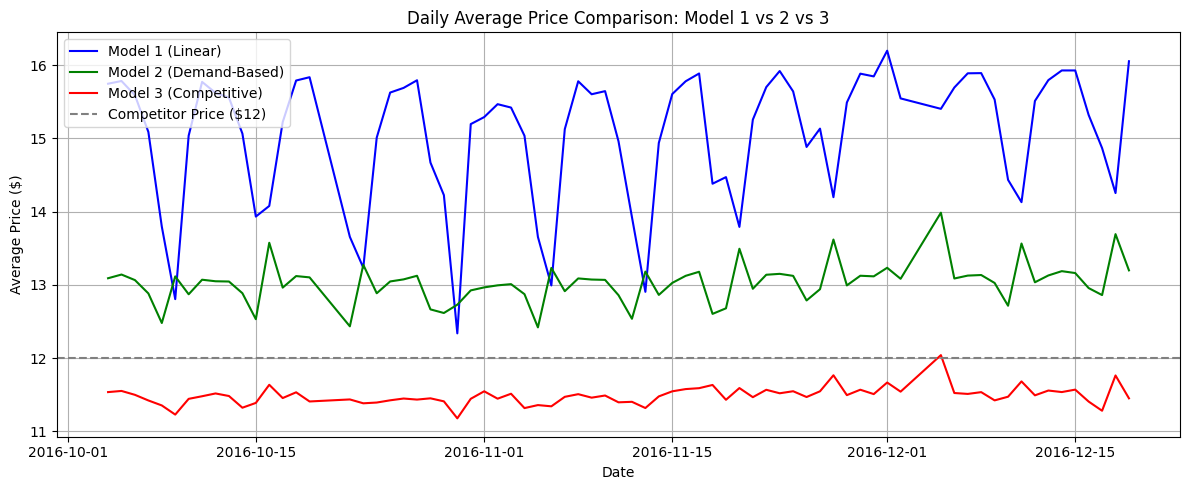

In [19]:
#bokeh plot isn't working so switching to matplotlib
#compared daily avg because all 14 parking lots together as overlapping lines was giving a visually cluttered result.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_avg["date"], daily_avg["price_m1"], label="Model 1 (Linear)", color="blue")
plt.plot(daily_avg["date"], daily_avg["price_m2"], label="Model 2 (Demand-Based)", color="green")
plt.plot(daily_avg["date"], daily_avg["price_m3"], label="Model 3 (Competitive)", color="red")
plt.axhline(12.0, color="gray", linestyle="--", label="Competitor Price ($12)")

plt.xlabel("Date")
plt.ylabel("Average Price ($)")
plt.title("Daily Average Price Comparison: Model 1 vs 2 vs 3")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


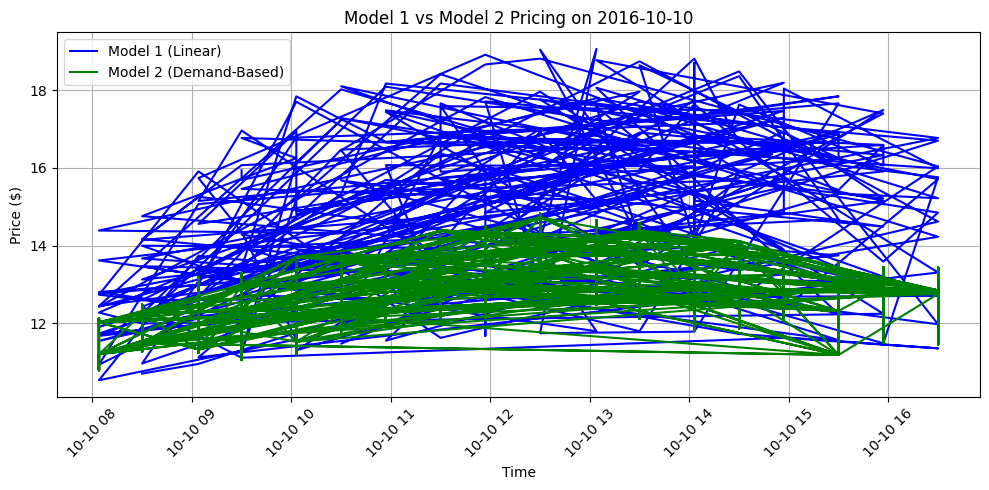

In [18]:
#a specific lot and date from the dataset
single_day = merged[merged["timestamp"].dt.date == pd.to_datetime("2016-10-10").date()]

# plot
plt.figure(figsize=(10, 5))
plt.plot(single_day['timestamp'], single_day['price_m1'], label='Model 1 (Linear)', color='blue')
plt.plot(single_day['timestamp'], single_day['price_m2'], label='Model 2 (Demand-Based)', color='green')
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title("Model 1 vs Model 2 Pricing on 2016-10-10")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-4116248771.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  merged["hour"] = merged["timestamp"].dt.floor("H")


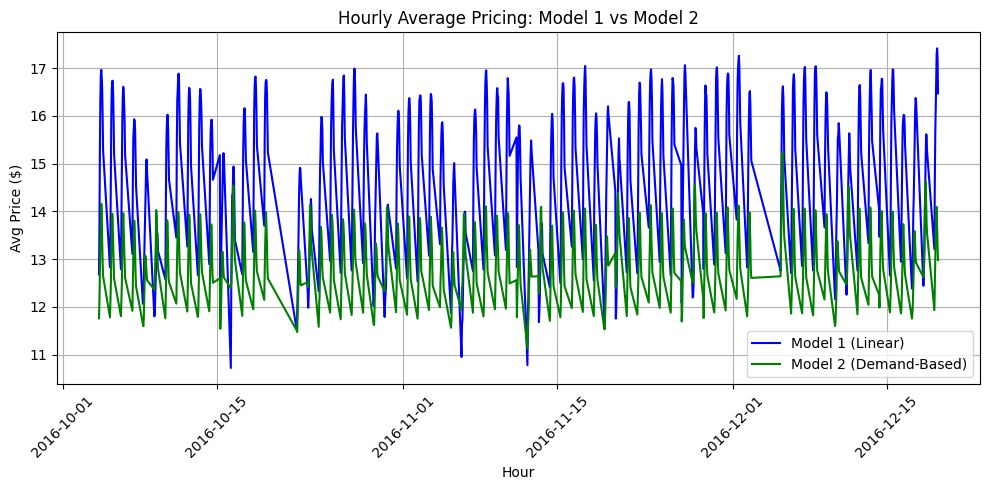

In [11]:
# round timestamps to hourly for smoothing
merged["hour"] = merged["timestamp"].dt.floor("H")

# Average price per hour across all lots
hourly_avg = merged.groupby("hour")[["price_m1", "price_m2"]].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg['hour'], hourly_avg['price_m1'], label='Model 1 (Linear)', color='blue')
plt.plot(hourly_avg['hour'], hourly_avg['price_m2'], label='Model 2 (Demand-Based)', color='green')
plt.xlabel("Hour")
plt.ylabel("Avg Price ($)")
plt.title("Hourly Average Pricing: Model 1 vs Model 2")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
